## Project Description

In this project, I implemented several supervised algorithms of my choice to accurately model individuals' income using data collected from the 1994 U.S. Census. Then choosen the best candidate algorithm from preliminary results and further optimized the algorithm to best model the data. Our goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50K. 

GOALS:
1. Performing Dimensionality reduction techniques PCA.
2. To find best supervised learning classification model with good performance metrics(accuracy, f1_score, recall_score, precision_score) which are trained on different data sizes.
3. Validating the selected model with new data set("Housing.csv"). Analyzing and comparing the results obtained. 

The dataset for this project originates from the UCI Machine Learning Repository.

### Import Required libraries

In [89]:
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import seaborn as sns

import pandas as pd

import numpy as np

#import visuals as vs

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Markdown

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Data Exploration

In [90]:

def printmd(string):
    display(Markdown(string))

adult_data = pd.read_csv('adult.csv', nrows = 20433)

housing = pd.read_csv('housing.csv')

display(adult_data.head())

display(housing.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [91]:
printmd("#### Dropping variables which are non-relevant")
adult_data.drop(labels = ['fnlwgt', 'relationship'], axis = 1, inplace = True)


#### Dropping variables which are non-relevant

"fnlwgt" appears to be a highly dispersive. In fact, it is a weight on the Current Population Survey (CPS) files. We will not incorporate fnlwgt in set of predictor variables. The "relationship" variable also seems to be trivial and not useful for the prediction "Income" of an individual, hence we drop both the variables from the data.

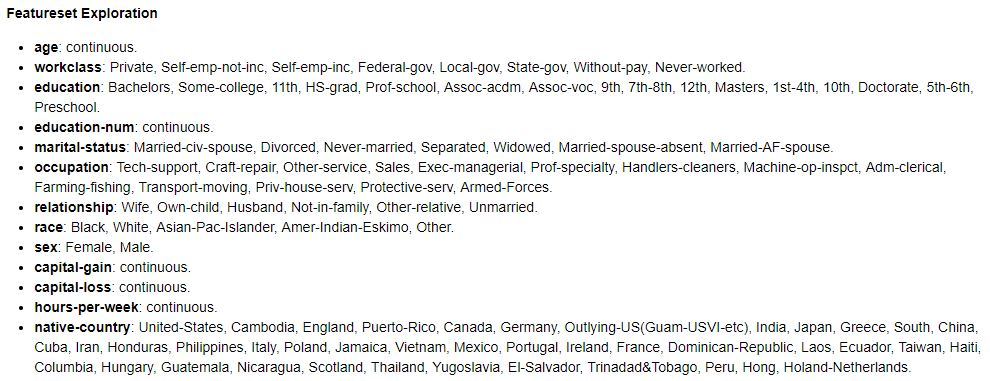

### Data Preprocessing

#### Data Cleaning(Handling Missing Data, outliers etc)

In [92]:
print('Are there any null values in "adult dataset":',adult_data.isnull().values.any())
print('Are there any null values in "housing dataset":',housing.isnull().values.any())

Are there any null values in "adult dataset": False
Are there any null values in "housing dataset": True


In [93]:
printmd('#### Missing values of Adult data :')
for i,j in zip(adult_data.columns,(adult_data.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        printmd(str(i) + ': ' + str(j) + ' records')
        print("Percent over total sample size: {0:.2f}%".format(float(j)/adult_data.shape[0]*100))

#### Missing values of Adult data :

workclass: 1235 records

Percent over total sample size: 6.04%


occupation: 1238 records

Percent over total sample size: 6.06%


native-country: 352 records

Percent over total sample size: 1.72%


The Missing values are from the "Categorical features" of the data set. Considering the relative low portion of missing data, we could discard rows with missing data or we fill them with most frequent value of the feature variable. In this case as missing values are from categorical variables we fill them with "Mode(most frequent)" value.

In [94]:
printmd("#### Most frequent values of the missing categorical features are:")
print('Most frequent WORKCLASS category:', adult_data['workclass'].value_counts().idxmax())
print('Most frequent OCCUPATION category:', adult_data['occupation'].value_counts().idxmax())
print('Most frequent NATIVE-COUNTRY category:', adult_data['native-country'].value_counts().idxmax())

#### Most frequent values of the missing categorical features are:

Most frequent WORKCLASS category: Private
Most frequent OCCUPATION category: Prof-specialty
Most frequent NATIVE-COUNTRY category: United-States


#### Filling missing categorical values with the most frequent ones in the column

In [95]:
for i in range(len(adult_data['workclass'])):
    freq = adult_data['workclass'].iloc[i]
    if freq == '?':
        adult_data.at[i, 'workclass'] = 'Private'

for i in range(len(adult_data['occupation'])):
    freq = adult_data['occupation'].iloc[i]
    if freq == '?':
        adult_data.at[i, 'occupation'] = 'Prof-speciality'

for i in range(len(adult_data['native-country'])):
    freq = adult_data['native-country'].iloc[i]
    if freq == '?':
        adult_data.at[i, 'native-country'] = 'United-States'
adult_data.head()      



,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-speciality,White,Female,0,0,30,United-States,<=50K


## Analyze data

Let’s plot the distribution of each feature, so that we have a better understanding what we have in our data. We plot the number of values for each category feature and the histogram of the values for each continuous feature.
    

### Distribution of Adult Data

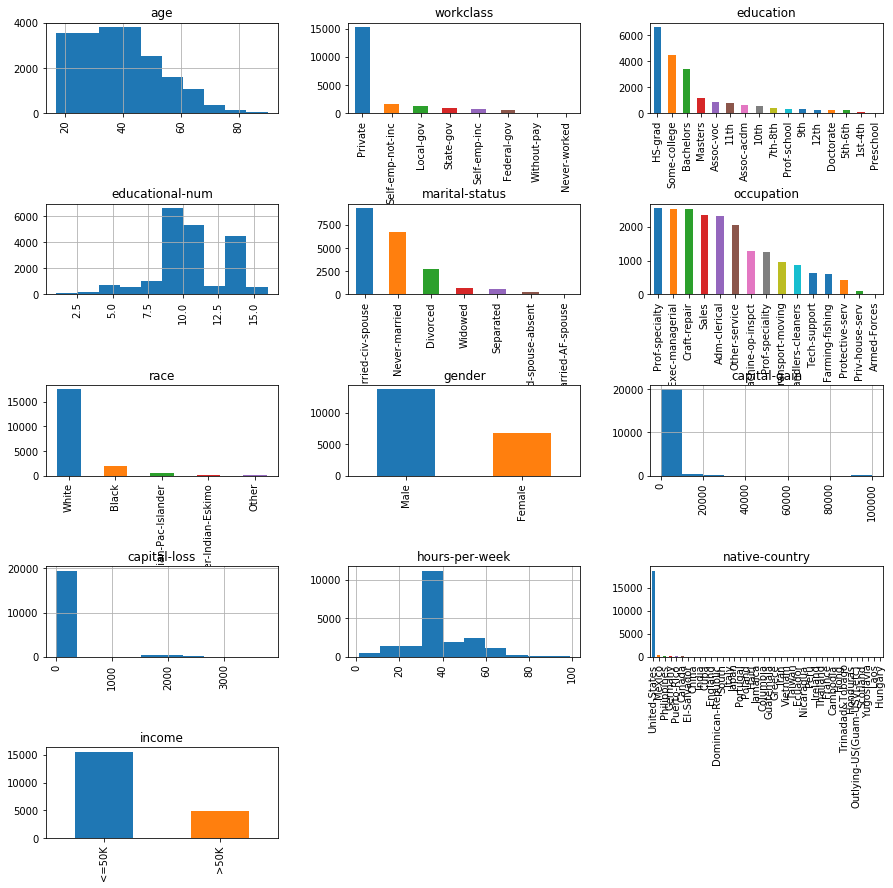

In [96]:
import math
fig = plt.figure(figsize=(15,15))
cols = 3
rows = math.ceil(float(adult_data.shape[1]) / cols)
for i, column in enumerate(adult_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult_data.dtypes[column] == np.object:
        adult_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=1.0, wspace=0.3)
printmd("### Distribution of Adult Data")


From the above figure, We could see that Dataset has most categorical variables, categorical variables with too many levels  lowers the performance level of the learning process. For example native-country  has maximum percentage of samples and has wide range, but only one value has highest frequency "United States". Hence it is needed to transform object type variables into numerical variables using "Label encoding", "Mapping" and "Replace" methods. Also, we need to find the correlation between features as highly correlated features are not good be in the data. 


### Distribution of Housing data

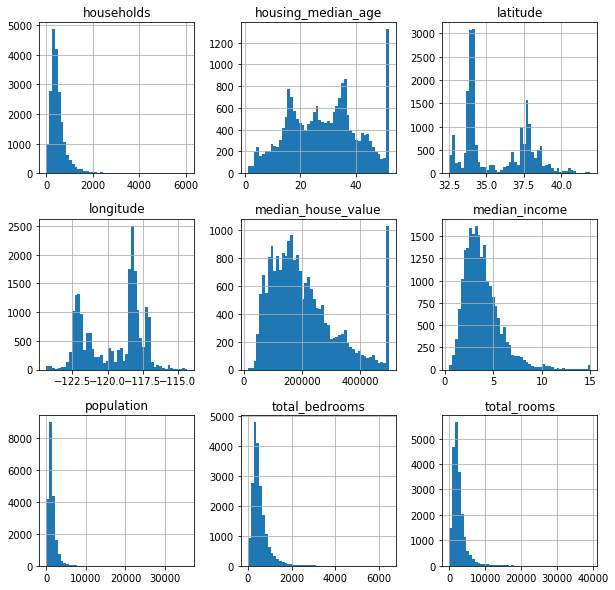

In [97]:
housing.hist(bins = 50, figsize = (10,10))
printmd("### Distribution of Housing data")
# housing.describe()

### Distribution of housing Data

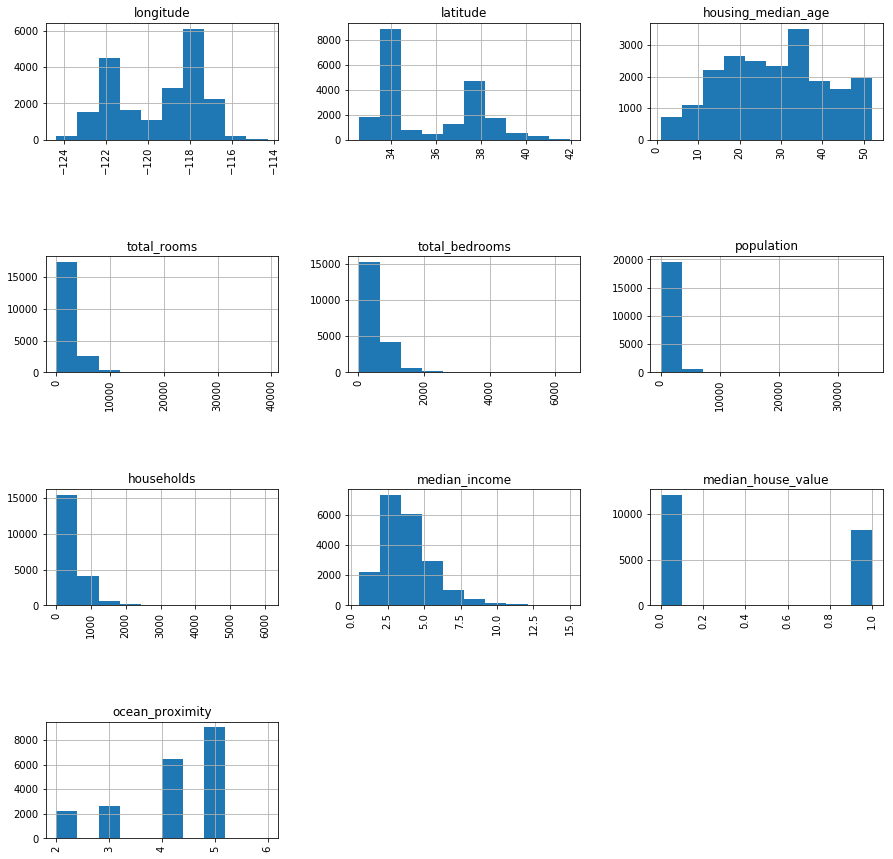

In [127]:
import math
fig = plt.figure(figsize=(15,15))
cols = 3
rows = math.ceil(float(housing.shape[1]) / cols)
for i, column in enumerate(housing.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if housing.dtypes[column] == np.object:
        housing[column].value_counts().plot(kind="bar", axes=ax)
    else:
        housing[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=1.0, wspace=0.3)
printmd("### Distribution of housing Data")


All the features except one of 'housing' dataset are numerical variables. By observing above figure it seems like some features are little skewed, which can be scaled between 0 and 1, during "Data Standardization". 

### Data Transformation
#### Mapping and Label Encoding

In [98]:
# convert categorical values into numerical values


sex = {'Male': 0, 'Female': 1}
adult_data['gender'] = adult_data['gender'].replace(['Male'],0)
adult_data['gender'] = adult_data['gender'].replace(['Female'],1)
adult_data['gender'] = adult_data['gender'].astype(int)


#race = {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Amer-Indian-Eskimo': 4, 'Other':5}
adult_data['race'] = adult_data['race'].replace(['White'], 1)
adult_data['race'] = adult_data['race'].replace(['Black'], 2)
adult_data['race'] = adult_data['race'].replace(['Asian-Pac-Islander'], 3)
adult_data['race'] = adult_data['race'].replace(['Amer-Indian-Eskimo'],4)
adult_data['race'] = adult_data['race'].replace(['Other'],5)

adult_data['race'] = adult_data['race'].astype(int)



for i in range(len(adult_data['native-country'])):
    country = adult_data['native-country'].iloc[i]
    if country == 'United-States':
        adult_data.at[i, 'native-country'] = 1
    else:
        adult_data.at[i, 'native-country'] = 0
        
adult_data["marital-status"] = adult_data["marital-status"].replace(['Never-married','Divorced',
                                                               'Separated','Widowed'], 'Single')
adult_data["marital-status"] = adult_data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent',
                                                               'Married-AF-spouse'], 'Married')

adult_data['marital-status'] = adult_data['marital-status'].replace(['Married'],1)
adult_data['marital-status'] = adult_data['marital-status'].replace(['Single'], 0)

adult_data['marital-status'] = adult_data['marital-status'].astype(int)

adult_data['workclass'] = adult_data['workclass'].replace(['Local-gov', 'Federal-gov','State-gov'], 'gov')

adult_data['workclass'] = adult_data['workclass'].replace(['Without-pay', 'Never-worked', 'Self-emp-not-inc'], 'Others')

adult_data['workclass'] = adult_data['workclass'].replace(['Self-emp-inc'], 'Private')



## LABEL ENCODING

adult_data['occupation'] = adult_data['occupation'].astype('category')

adult_data['occupation'] = adult_data['occupation'].cat.codes.astype(int)

adult_data['workclass'] = adult_data['workclass'].astype('category')

adult_data['workclass'] = adult_data['workclass'].cat.codes.astype(int)


adult_data['education'] = adult_data['education'].replace(['11th', '10th', '7th-8th','5th-6th', '9th', '12th', '1st-4th',
                                                             'Preschool'], 'drop-out')

adult_data['education'] = adult_data['education'].replace(['Assoc-acdm', 'Some-college','Prof-school', 'Assoc-voc'],
                                                          'some-college')

adult_data['education'] = adult_data['education'].replace('HS-grad', 'Bachelors')

adult_data['education'] = adult_data['education'].astype('category')

adult_data['education'] = adult_data['education'].cat.codes.astype(int)

        
# map income <50k to 0 and >50k to 1

adult_data["income"] = adult_data["income"].replace(['<=50K'], 0)
adult_data["income"] = adult_data["income"].replace(['>50K'], 1 )

adult_data['native-country'] = adult_data['native-country'].astype(int)

display(adult_data.head())


,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,3,7,0,6,2,0,0,0,40,1,0
1,38,1,0,9,1,4,1,0,0,0,50,1,0
2,28,2,4,12,1,11,1,0,0,0,40,1,1
3,44,1,4,10,1,6,2,0,7688,0,40,1,1
4,18,1,4,10,0,9,1,1,0,0,30,1,0


In [99]:
printmd("#### Data Transformation of 'Housing' dataset categorical variables")
mean_value = np.mean(housing['median_house_value'])
# print(mean_value)

for i in range(len(housing['median_house_value'])):
    if housing['median_house_value'].iloc[i] <= mean_value:
        housing.at[i, 'median_house_value'] = 0
    elif housing['median_house_value'].iloc[i] > mean_value:
        housing.at[i, 'median_house_value'] = 1
        
housing['ocean_proximity'] = housing['ocean_proximity'].replace(['NEAR BAY'], 2.0)
housing['ocean_proximity'] = housing['ocean_proximity'].replace(['NEAR OCEAN'], 3.0)
housing['ocean_proximity'] = housing['ocean_proximity'].replace(['INLAND'], 4.0)
housing['ocean_proximity'] = housing['ocean_proximity'].replace(['<1H OCEAN'], 5.0)
housing['ocean_proximity'] = housing['ocean_proximity'].replace(['ISLAND'], 6.0)

housing.head()

#### Data Transformation of 'Housing' dataset categorical variables

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1.0,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1.0,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1.0,2.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1.0,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1.0,2.0


In [100]:
printmd("#### variables with null values")
housing = pd.DataFrame(housing.dropna())
housing.isnull().sum()
housing.shape
# housing.head()
# housing['median_house_value'].unique()

#### variables with null values

(20433, 10)

### Split data into predictable features and target variable

In [101]:
# Splitting Adult dataset into features and response variable

adult_features = adult_data.drop('income', axis = 1) # Adult dataset Independent variables

adult_income = adult_data["income"]  # Adult dataset dependent variable
 
display(adult_features.head())

# Splitting validation dataset 'housing' into predictors and target

house_predictors = housing.drop('median_house_value', axis = 1) # housing dataset Independent variables

house_target = housing['median_house_value'] # housing dataset dependent variable

display(house_predictors.head())

house_target.shape


,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,1,3,7,0,6,2,0,0,0,40,1
1,38,1,0,9,1,4,1,0,0,0,50,1
2,28,2,4,12,1,11,1,0,0,0,40,1
3,44,1,4,10,1,6,2,0,7688,0,40,1
4,18,1,4,10,0,9,1,1,0,0,30,1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,2.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,2.0


(20433,)

###  Data Standardization
Standardize the variables using "StandardScaler" method making mean '0' and standard deviation to '1', such that all the feature variables will be in same scale.

In [102]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Standardizing adult dataset 

scaled_adult_data = scaler.fit_transform(adult_features)

scaled_adult_data = pd.DataFrame(scaled_adult_data)

scaled_adult_data.columns = adult_data.columns.drop('income')

display(scaled_adult_data.head())

# Standardizing housing dataset

house_std = scaler.fit_transform(house_predictors)

house_std = pd.DataFrame(house_std)

house_std.columns = house_predictors.columns

display(house_std.head())


,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.998116,-0.116060,0.681560,-1.199184,-0.940355,-0.121203,1.268630,-0.703295,-0.142677,-0.22066,-0.034303,0.300762
1,-0.056371,-0.116060,-0.972200,-0.419196,1.063428,-0.580972,-0.351186,-0.703295,-0.142677,-0.22066,0.773396,0.300762
2,-0.780791,2.053614,1.232814,0.750786,1.063428,1.028220,-0.351186,-0.703295,-0.142677,-0.22066,-0.034303,0.300762
3,0.378281,-0.116060,1.232814,-0.029202,1.063428,-0.121203,1.268630,-0.703295,0.891743,-0.22066,-0.034303,0.300762
4,-1.505210,-0.116060,1.232814,-0.029202,-0.940355,0.568450,-0.351186,1.421879,-0.142677,-0.22066,-0.842003,0.300762


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,-2.083834
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-2.083834
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,-2.083834
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,-2.083834
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,-2.083834


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216EECBBB38>,
      dtype=object)

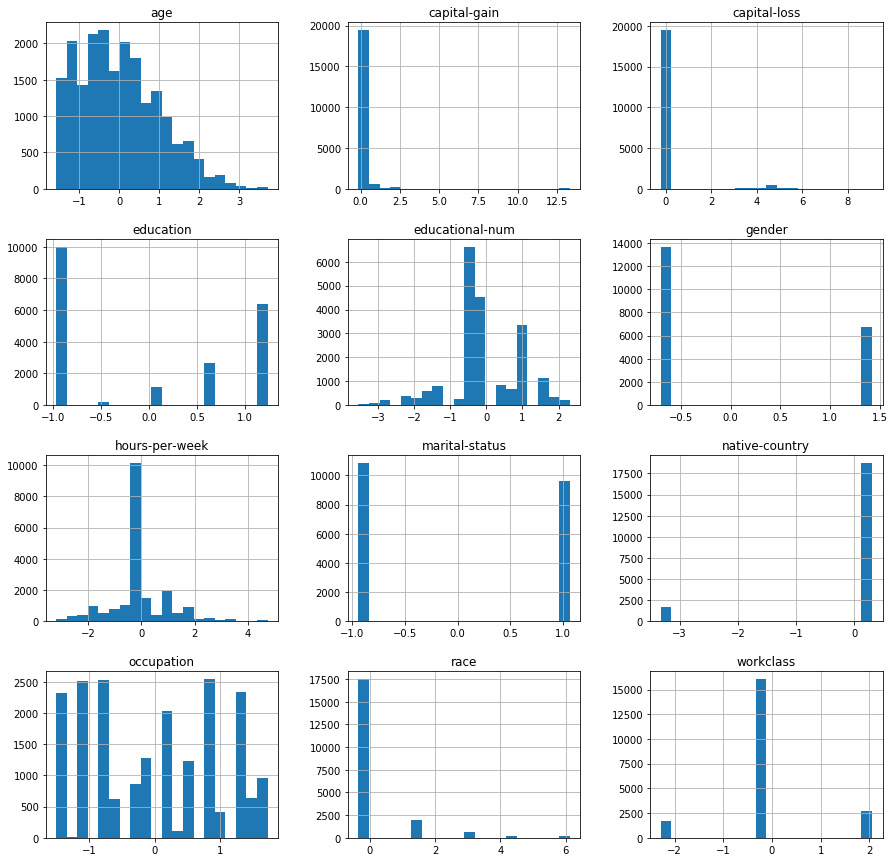

In [103]:
scaled_adult_data.hist(bins = 20, figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216EF0426A0>,
      dtype=object)

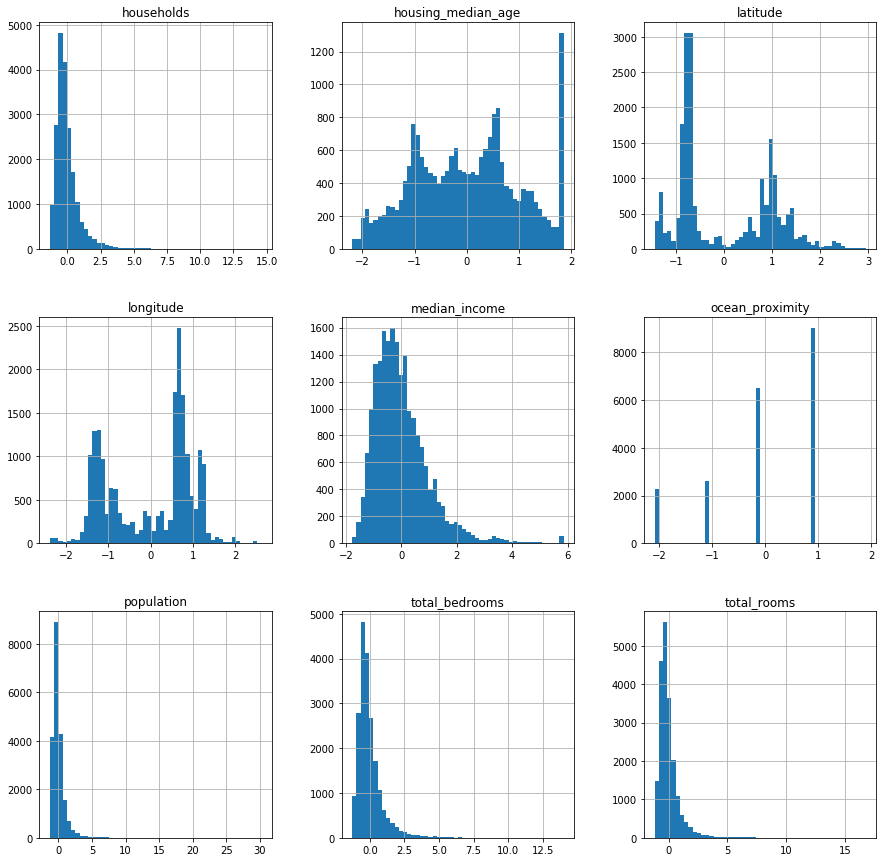

In [104]:
house_std.hist(bins = 50, figsize = (15,15))

It is clearly seen in the above that all the features are now normally distributed around zero.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### Check for correlation between the features

In [105]:
scaled_adult_data.corr()

,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
age,1.000000,-0.040511,-0.069755,0.018951,0.319530,-0.000352,-0.040494,-0.083436,0.075291,0.056044,0.069939,0.010167
workclass,-0.040511,1.000000,-0.007998,0.103038,-0.059136,0.002117,0.069665,0.089878,-0.025800,0.000177,-0.054368,0.031442
education,-0.069755,-0.007998,1.000000,-0.126714,-0.056239,0.005101,0.017007,0.030526,-0.003223,-0.009059,-0.075549,-0.027454
educational-num,0.018951,0.103038,-0.126714,1.000000,0.068879,0.099729,-0.035700,-0.007233,0.127382,0.084106,0.141391,0.132860
marital-status,0.319530,-0.059136,-0.056239,0.068879,1.000000,0.018449,-0.062579,-0.417510,0.077767,0.070761,0.214737,-0.036108
occupation,-0.000352,0.002117,0.005101,0.099729,0.018449,1.000000,-0.004404,-0.038020,0.015923,0.013272,-0.008845,0.012876
race,-0.040494,0.069665,0.017007,-0.035700,-0.062579,-0.004404,1.000000,0.063675,-0.010881,-0.015359,-0.033606,-0.232959
gender,-0.083436,0.089878,0.030526,-0.007233,-0.417510,-0.038020,0.063675,1.000000,-0.043984,-0.048376,-0.226891,0.014682
capital-gain,0.075291,-0.025800,-0.003223,0.127382,0.077767,0.015923,-0.010881,-0.043984,1.000000,-0.031483,0.086530,0.006236
capital-loss,0.056044,0.000177,-0.009059,0.084106,0.070761,0.013272,-0.015359,-0.048376,-0.031483,1.000000,0.059928,0.005521


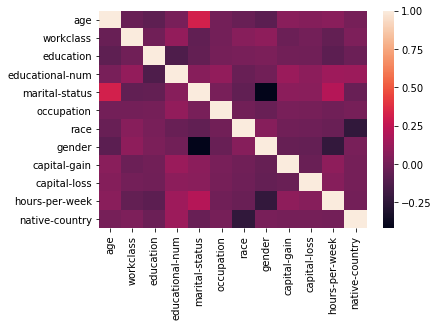

In [106]:
import matplotlib.pyplot as plt

import seaborn as sns

corr_mat = scaled_adult_data.corr()
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns)
#sns.plot.show()



For adult dataset it Seems like no feature is highly correlated to any other feature.

### Dimensionality Reduction

#### Principal Component Analysis(PCA) on Adult dataset

#### Finding best 'k' PC components based on variance

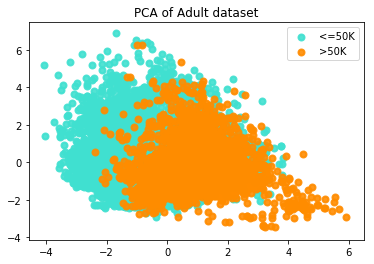

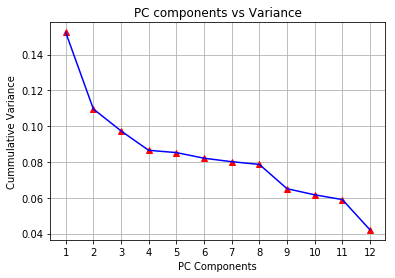

In [107]:
printmd("#### Finding best 'k' PC components based on variance")
from sklearn.decomposition import PCA

pca = PCA()
pca_adult_features = pca.fit_transform(scaled_adult_data)

x = np.arange(1, 13)
y = pca.explained_variance_ratio_

colors = ['turquoise', 'darkorange']
target_names = ['<=50K','>50K']

plt.figure()

for color, i, target in zip(colors, [0, 1], target_names):
    plt.scatter(pca_adult_features[adult_income == i, 0], pca_adult_features[adult_income == i, 1], color=color, 
                alpha=0.9, lw=2, label = target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Adult dataset')
plt.figure()
plt.plot(x, y,'r^')
plt.plot(x, y, color = 'b')
plt.title('PC components vs Variance')
plt.xlabel('PC Components')
plt.ylabel('Cummulative Variance')
plt.xticks(np.arange(1, 13, step = 1.0))
# print("proportion:",pca.explained_variance_ratio_)
# print("cummulative proportion:",np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.show()

#### Finding best 'k' PC components based on variance

cummulative proportion: [0.4352562  0.67861825 0.79819869 0.89412393 0.9679857  0.98425241
 0.99324437 0.99835185 1.        ]


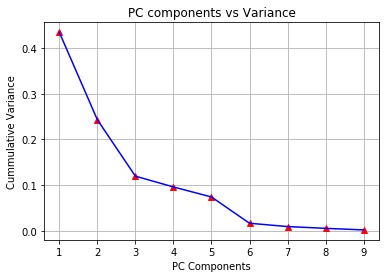

In [126]:
printmd("#### Finding best 'k' PC components based on variance")
from sklearn.decomposition import PCA

h_pca = PCA()
pca_house_features = h_pca.fit_transform(house_std)

x = np.arange(1, 10)
y = h_pca.explained_variance_ratio_

# colors = ['turquoise', 'darkorange']
# target_names = ['<=50K','>50K']

# plt.figure()

# for color, i, target in zip(colors, [0, 1], target_names):
#     plt.scatter(pca_adult_features[adult_income == i, 0], pca_adult_features[adult_income == i, 1], color=color, 
#                 alpha=0.9, lw=2, label = target)
    
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA of Adult dataset')
plt.figure()
plt.plot(x, y,'r^')
plt.plot(x, y, color = 'b')
plt.title('PC components vs Variance')
plt.xlabel('PC Components')
plt.ylabel('Cummulative Variance')
plt.xticks(np.arange(1, 10, step = 1.0))
# plt.yticks(y)
# print("proportion:",h_pca.explained_variance_ratio_)
print("cummulative proportion:",np.cumsum(h_pca.explained_variance_ratio_))
plt.grid(True)
plt.show()

From the plot "PC components vs Variance", we can see that the first component has just gives 15% variance and we could achieve maximum variance of about 90% if we extract atleast 10 components in our data. Hence we should consider other approach to perform dimensionality reduction.  

### Finding Best number of PCA components based on Logistic Regression Accuracy

Accuracy Scores: [79.58, 80.675, 81.385, 81.489, 81.568, 81.342, 82.627, 82.719, 83.269, 83.269, 83.269, 83.862]


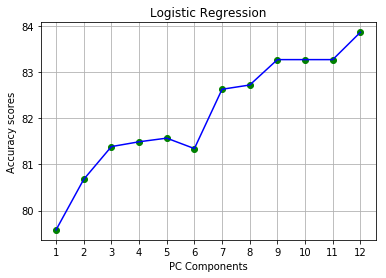

In [109]:

pca_list = []

for i in range(1,13):
    pca = PCA(n_components = i)
    adult_features = pca.fit_transform(scaled_adult_data)
    #features_house = pca.fit_transform(house_std)
    pca_list.append(adult_features)
    
x_train_list = []
x_test_list = []
y_train_list = []
y_test_list = []

for i in range(len(pca_list)):
    
    x_train, x_test, y_train, y_test = train_test_split(pca_list[i], adult_income, test_size = 0.80, random_state = 42)
    
    x_train_list.append(x_train)
    x_test_list.append(x_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

y_pred = []
acc_score_list = []

for i in range(len(x_train_list)):
    
    #clf = RandomForestClassifier(max_depth = 2, random_state = 0)
    clf = LogisticRegression()
        
    clf.fit(x_train_list[i], y_train_list[i])
    
    y_pred.append(clf.predict(x_test_list[i]))
    
    acc_score_list.append(round(accuracy_score(y_pred[i], y_test_list[i])*100,3))
    
print('Accuracy Scores:', acc_score_list)
plt.title("Logistic Regression")
plt.xticks(np.arange(1, 13, step = 1.0))
x1 = np.arange(1, 13)
plt.plot(x1, acc_score_list, 'go')

plt.plot(x1, acc_score_list, color = 'b') 
plt.xlabel('PC Components')
plt.ylabel('Accuracy scores')
plt.grid(True)
plt.show()

Based on the above figure we see that above k = 7 components the accuracy scores are pretty similar, we could select '7' PC components as a tradeoff such that we will get good accuracy score as well as we reduce computational time and work by reducing dimensions. Hence we go ahead and reduce the dimensions to four components on "adult" and "housing" features. Such that when we validate using housing dataset on the models which trained using 'adult dataset' be in same dimensions.

#### Reducing dimensions to k = 7 components for both standardized adult, housing features

In [110]:
adult_pca = PCA(n_components = 7)
adult_pca_features = adult_pca.fit_transform(scaled_adult_data)

houses_pca = PCA(n_components = 7)
houses_pca_features = houses_pca.fit_transform(house_std)


In [111]:
pca_house = PCA(n_components = 5)
house_pca_features = pca_house.fit_transform(house_std)

### Developing a Model

### Training and testing different models on 'Adult' dataset using KFOLD cross validation

Using KFOLD method provides train/test indices to split data in train/test sets. Split dataset into k = 5(in this case) consecutive folds (by keeping shuffle = True).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

We train several classification models on this train/test sets and find the best model with good accuracy score. 

In [112]:

kfold = KFold(n_splits=5, shuffle = True)

# X is the feature set and y is the target
X_train_list = []
X_test_list = []
Y_train_list = []
Y_test_list = []

for train_index, test_index in kfold.split(adult_pca_features,adult_income):
    X_train, X_test = adult_pca_features[train_index], adult_pca_features[test_index]
    Y_train, Y_test = adult_income[train_index], adult_income[test_index]
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    Y_train_list.append(Y_train)
    Y_test_list.append(Y_test)
    
models = []
models.append(LogisticRegression())
models.append(LinearDiscriminantAnalysis())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(RandomForestClassifier(max_depth = 2, random_state = 0))
models.append(KNeighborsClassifier())

# names = ['LogisticRegression:',1 , 'LDA:', 2, 'GaussianNB:',3, 'RandoMForest:',4, 'KNN:']


kfold_adult_acc = []

kfold_houses_acc = []

for model in models:
    
    adult_acc = []
    houses_acc = []
    
    for j in range(len(X_train_list)):  
                 
        clf = model
        
        clf.fit(X_train_list[j], Y_train_list[j])
        
        Y_pred = clf.predict(X_test_list[j])
        
        adult_acc.append(round(accuracy_score(Y_pred, Y_test_list[j])*100,2))
        
        pred = clf.predict(houses_pca_features)
        
        houses_acc.append(round(accuracy_score(pred, house_target)*100,2))

    kfold_adult_acc.append(adult_acc)
    kfold_houses_acc.append(houses_acc)

# kfold_adult_acc



### Training and Testing features on different models with different training sizes(10%, 20%, 30%, 40%, 50% of data size

In [113]:

x_train_list = []
x_test_list = []
y_train_list = []
y_test_list = []

## Training model for percentage of training sizes 10, 20, 30, 40, 50

for i in range(50, 100, 10):
    
    x_train, x_test, y_train, y_test = train_test_split(adult_pca_features, adult_income, 
                                                        test_size = i, random_state = 0)
    
    x_train_list.append(x_train)
    x_test_list.append(x_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
models = []
models.append(LogisticRegression())
models.append(LinearDiscriminantAnalysis())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(RandomForestClassifier(max_depth = 2, random_state = 0))
models.append(KNeighborsClassifier())


model_adult_acc = [] # list of accuracies of all models for different training sizes
model_house_acc = []

for model in models:
    
    adult_acc = []
    house_acc = []
    
    for j in range(len(x_train_list)-1, -1, -1):  
                 
        clf = model
        
        clf.fit(x_train_list[j], y_train_list[j])
        
        y_pred = clf.predict(x_test_list[j])
        
        adult_acc.append(round(accuracy_score(y_pred, y_test_list[j])*100,2))
                
        
            
        
    model_adult_acc.append(adult_acc)

# model_adult_acc

## Analyzing and Evaluating Results


### Analysis on Adult dataset 

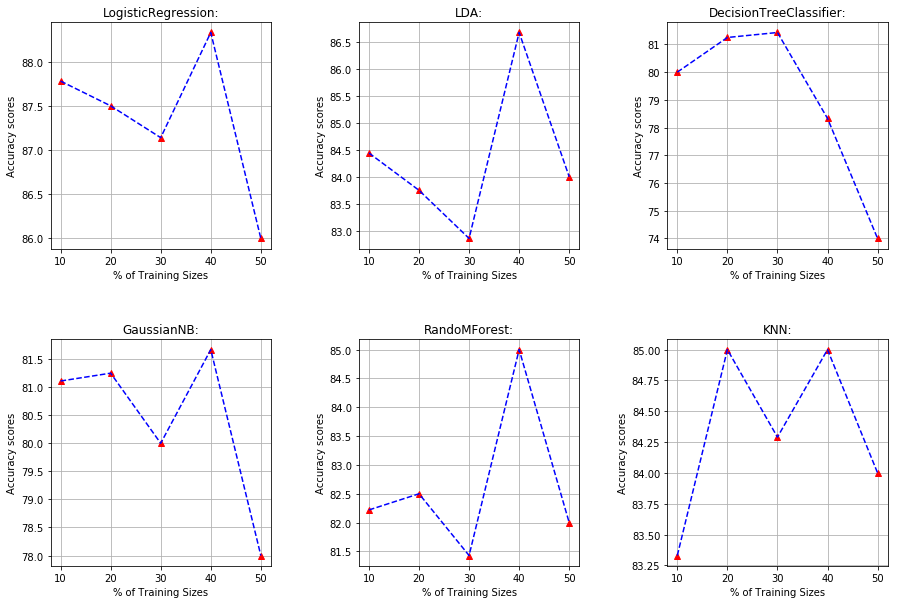

In [114]:
fig = plt.figure(figsize=(15,10))
cols = 3
rows = 2

printmd("### Analysis on Adult dataset ")

names = ['LogisticRegression:' ,'LDA:', 'DecisionTreeClassifier:', 'GaussianNB:', 'RandoMForest:', 'KNN:']

for i, name in enumerate(names):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(name)
    x_axis = np.arange(10,51, step = 10)
    plt.plot(x_axis,model_adult_acc[i], 'r^', axes = ax )
    plt.plot(x_axis, model_adult_acc[i], color = 'b', linestyle = '--', axes = ax)
    plt.xlabel('% of Training Sizes')
    plt.ylabel('Accuracy scores')
    plt.grid(True)

plt.subplots_adjust(hspace=0.4, wspace=0.4)


The analysis above shows that "Logistic Regression" model with high accuracy score(88.33%).

#### Finding F1_score, recall_score, precision_score values for all the above models for the particular percent of training size where that model achieved highest accuracy score.

#### Logistic Regression, LDA, GaussianNB, RandomForest Models got their highest accuracy score when they are trained for 40% of training size of "Adult" dataset. Whereas DecisionTree Classifier achieved at 30% training size and KNN at 50% of training size.



In [115]:
## Metrics : Recall, f1_score, precision for "Logistic Regression"
from sklearn.metrics import recall_score, precision_score
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
f_score = []
recall = []
precision = []
# del(models[2])
#del(models[4])

for model in models:
    clf = model
    clf.fit(x_train_list[1], y_train_list[1])
    y_pred = clf.predict(x_test_list[1])
    f_score.append(round(f1_score(y_pred, y_test_list[1], average = 'macro'),3))
    recall.append(round(recall_score(y_pred, y_test_list[1], average = 'macro'),3))
    precision.append(round(precision_score(y_pred, y_test_list[1], average = 'macro'), 3))

printmd("#### performance metrics scores of Logistic Regression, LDA, GaussianNB, RandomForest")
print("F1_score:",f_score)
print("Recall score:", recall)
print("Precision score:", precision)

## Decision Tree performance metrics

printmd("#### performance metrics scores of Decision Tree Classifier")

Dtree = DecisionTreeClassifier()
Dtree.fit(x_train_list[2], y_train_list[2])
Dtree_pred = Dtree.predict(x_test_list[2])
fscore = round(f1_score(Dtree_pred, y_test_list[2], average = 'macro'),3)
recall_tree = round(f1_score(Dtree_pred, y_test_list[2], average = 'macro'),3)
precision_tree = round(f1_score(Dtree_pred, y_test_list[2], average = 'macro'),3)

print("DTree fscore:", fscore)
print("DTree recall score:", recall_tree)
print("DTree precision score:", precision_tree)

printmd("#### performance metrics scores of K Nearest Neighbor Classifier")


knn = KNeighborsClassifier()
knn.fit(x_train_list[0], y_train_list[0])
knn_pred = knn.predict(x_test_list[0])
fscore_knn = round(f1_score(knn_pred, y_test_list[0], average = 'macro'),3)
recall_knn= round(recall_score(knn_pred, y_test_list[0], average = 'macro'),3)
precision_knn = round(precision_score(knn_pred, y_test_list[0], average = 'macro'),3)
print("KNN fscore:", fscore_knn)
print("KNN recall score:", recall_knn)
print("KNN precision score:", precision_knn)


#### performance metrics scores of Logistic Regression, LDA, GaussianNB, RandomForest

F1_score: [0.733, 0.63, 0.625, 0.45, 0.459, 0.74]
Recall score: [0.787, 0.772, 0.615, 0.422, 0.425, 0.719]
Precision score: [0.703, 0.601, 0.644, 0.48, 0.5, 0.775]


#### performance metrics scores of Decision Tree Classifier

DTree fscore: 0.688
DTree recall score: 0.688
DTree precision score: 0.688


#### performance metrics scores of K Nearest Neighbor Classifier

KNN fscore: 0.75
KNN recall score: 0.734
KNN precision score: 0.772


### Picking the best model with good performance metric scores

"Logistic Regression" gives good performance measure (testing accuracy score = 88.33%), f1_score = 0.733, recall_score = 0.787 and precision_score = 0.703 which seems reasonable to pick Logistic regression as the best suitable model for "Adult" dataset compared to other models. 

### Validating the best chosen model with different dataset "Housing.csv" for accuracy

In [116]:
clf = LogisticRegression()
clf.fit(x_train_list[1], y_train_list[1])
house_predict = clf.predict(houses_pca_features)
accuracy = accuracy_score(house_predict, house_target)
printmd("#### Accuracy of Housing dataset for chosen model(Logistic Regression):")
print("{0:.2%}".format(accuracy))

#### Accuracy of Housing dataset for chosen model(Logistic Regression):

62.18%


### Training and testing "housing.csv" on best chosen model

#### Accuracy of Housing dataset for chosen model(PCA Logistic Regression):

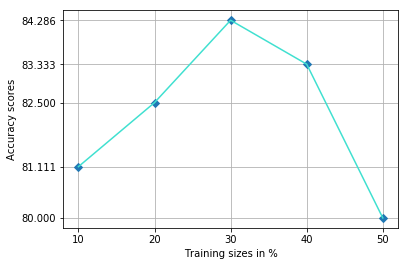

In [125]:
hx_train = []
hx_test = []
hy_train = []
hy_test = []
for i in range(50, 100, 10):
    house_train, house_test, price_train, price_test = train_test_split(house_pca_features, house_target, 
                                                                    test_size = i, random_state = 0)
    hx_train.append(house_train)
    hx_test.append(house_test)
    hy_train.append(price_train)
    hy_test.append(price_test)
    
# clf.fit(x_train_list[1], y_train_list[1])
h_acc = []
for j in range(len(hx_train)):
    clf = LogisticRegression()

    clf.fit(hx_train[j], hy_train[j])
    house_predict = clf.predict(hx_test[j])
# accuracy = accuracy_score(house_predict, house_target)
    accuracy = accuracy_score(house_predict, hy_test[j])*100
    h_acc.append(accuracy)

printmd("#### Accuracy of Housing dataset for chosen model(PCA Logistic Regression):")
# print("{0:.2%}".format(max(h_acc)))

axis = np.arange(50, 1, step = -10)
plt.figure()
plt.plot(axis, h_acc, 'D')
plt.plot(axis, h_acc, color = 'turquoise')
plt.xlabel("Training sizes in %")
plt.ylabel("Accuracy scores")
plt.xticks(axis)
plt.yticks(h_acc)
plt.grid(True)
plt.show()

### Optimizing 'Logistic Regression' Model to generalize well with the data and to improve performance metric scores using GridSearch 

In [397]:
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, precision_recall_fscore_support
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    regressor = LogisticRegression(random_state = 0)
    
    params = {"C": [0.1, 0.3, 0.5, 0.8], "class_weight": ["balanced", None,]}

    
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0)
    
    grid = GridSearchCV(regressor, params, scoring = make_scorer(r2_score), cv=cv)

    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [404]:
reg = fit_model(x_train_list[1], y_train_list[1])


In [399]:
# Method to built Confusion Matrix

def _build_df_from_confusion_matrix(confusion_matrix, as_fractions=False):
    if as_fractions:
        x = np.array(confusion_matrix)
        x = np.apply_along_axis(
            lambda row: [
                row[0] / (row[0] + row[1]),
                row[1] / (row[0] + row[1])
            ],
            1,
            x
        )
    else:
        x = confusion_matrix
    df = pd.DataFrame(
        x,
        index=["<= 50K", "> 50K"],
        columns=["<= 50K", "> 50K"]
    )
    df.index.names = ["Actual"]
    df.columns.names = ["Predicted"]
    return df

In [402]:
y_test_predicted = reg.predict(x_test_list[1])
print("Test set accuracy score: {}".format(accuracy_score(y_test_list[1], y_test_predicted)*100))

print("Test set AUROC score: {}".format(reg.score(x_test_list[1], y_test_list[1])*100))

print("\nConfusion matrix for test set:")

test_confusion_matrix = confusion_matrix(y_test_list[1], y_test_predicted)

display(_build_df_from_confusion_matrix(test_confusion_matrix, as_fractions = True))


print("Precision, recall, f-score:")
precision_recall_fscore_support(y_test_list[1], y_test_predicted)

Test set accuracy score: 88.33333333333333
Test set AUROC score: 88.33333333333333

Confusion matrix for test set:


Predicted,<= 50K,> 50K
Actual,,
<= 50K,0.960784,0.039216
> 50K,0.555556,0.444444


Precision, recall, f-score:


(array([0.90740741, 0.66666667]),
 array([0.96078431, 0.44444444]),
 array([0.93333333, 0.53333333]),
 array([51,  9], dtype=int64))

### Conclusion

The Logistic Regression Model when trained and tested on "adult" dataset produced good accuracy score: 88.33%.​

When the model as a generalized model validated/tested with new dataset "housing" produced a considerable accuracy score: 62.18%.​

As the model optimized further using Grid Search technique produced good performance measure scores for both the datasets, which says that the model generalized well with the data. ​

Hence I conclude that this is a generic model which produces accurate results for similar type of problems.​

Future Work:​

We can further optimize to increase the performance of the model by retrieving deeper insights using learning curves, model complexity graph showing bias variance tradeoff etc.​

​